In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [41]:
train_csv = pd.read_csv("train.csv")
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
train_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
#Só uma cópia
x_train = train_csv
x_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
#Male = 1
#Female = 2
x_train.loc[x_train['Sex'] == "male" , 'Sex'] = 1    
x_train.loc[x_train['Sex'] ==  "female" ,'Sex'] = 2   

x_train["Sex"].value_counts()

Sex
1    577
2    314
Name: count, dtype: int64

In [45]:

x_train.loc[x_train['Embarked'] == "S" , 'Embarked'] = 1    
x_train.loc[x_train['Embarked'] ==  "C" ,'Embarked'] = 2  
x_train.loc[x_train['Embarked'] ==  "Q" ,'Embarked'] = 3  

In [46]:
x_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
x_train["Age"] = x_train["Age"].fillna(method='ffill').fillna(method='bfill')
x_train["Embarked"] = x_train["Embarked"].fillna(method='ffill').fillna(method='bfill')

C:\Users\Nidal\AppData\Local\Temp\ipykernel_1696\2258229034.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train["Age"] = x_train["Age"].fillna(method='ffill').fillna(method='bfill')
C:\Users\Nidal\AppData\Local\Temp\ipykernel_1696\2258229034.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train["Embarked"] = x_train["Embarked"].fillna(method='ffill').fillna(method='bfill')


In [48]:
x_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [49]:
x_train["Age"].value_counts
x_train["Age"].tail(30)

861    21.0
862    48.0
863    48.0
864    24.0
865    42.0
866    27.0
867    31.0
868    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [50]:
x_train["Age"] = np.ceil(x_train["Age"])
x_train["Age"].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    19
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [64]:
x_train_load = x_train[["PassengerId", "Survived", "Pclass", "Sex", "Age","SibSp", "Parch" ,"Fare", "Embarked"]]

In [66]:
x_train_load.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [67]:
y = x_train_load[["Survived"]]
x = x_train_load[["Pclass","Sex","Age","Fare","SibSp","Parch","Embarked"]]

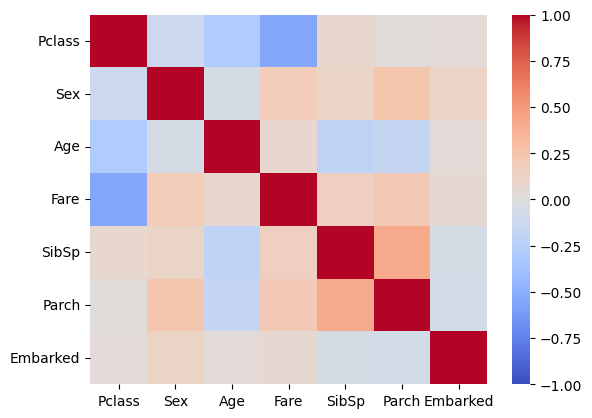

In [68]:
sns.heatmap(x.corr(), annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [70]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [72]:
accuracy = regression.score(X_test, Y_test)
accuracy

0.35486759435673076

In [73]:

y_pred = regression.predict(X_test) 
y_pred

array([[ 0.15941022],
       [ 0.21445682],
       [-0.00687075],
       [ 0.29402719],
       [ 0.13476149],
       [ 0.09507909],
       [ 0.00518694],
       [ 0.55207324],
       [ 0.4827311 ],
       [ 0.5695666 ],
       [ 0.22580046],
       [ 0.35215328],
       [ 1.02765073],
       [ 0.09913682],
       [ 0.55311749],
       [ 0.33189829],
       [-0.03527303],
       [ 0.84274883],
       [ 0.02709173],
       [ 0.15519637],
       [ 0.43878996],
       [ 0.45568091],
       [ 0.72567546],
       [ 0.68078313],
       [ 0.65810747],
       [ 0.09516969],
       [ 0.66601806],
       [ 0.12347019],
       [ 0.29263646],
       [ 1.04113803],
       [ 0.14617515],
       [ 0.74062003],
       [ 0.88827569],
       [ 0.14614696],
       [ 0.37342065],
       [ 0.34229391],
       [ 0.64282757],
       [ 0.56765189],
       [ 0.11970098],
       [ 0.23412547],
       [ 0.17997937],
       [ 0.90434687],
       [ 0.4126517 ],
       [ 0.17141509],
       [-0.34771358],
       [-0

In [74]:
survived_pred = pd.DataFrame(y_pred, columns=["Survived"])
survived_pred

,Survived
0,0.159410
1,0.214457
2,-0.006871
3,0.294027
4,0.134761
...,...
218,0.004495
219,0.066751
220,0.739717
221,0.115381


In [76]:
survived_pred = survived_pred.round()
survived_pred = survived_pred.abs()
survived_pred

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
218,0.0
219,0.0
220,1.0
221,0.0


In [77]:
survived_pred.value_counts()

Survived
0.0         155
1.0          68
Name: count, dtype: int64

In [81]:
survived_pred["PassengerId"] = survived_pred.index + 1
survived_pred = survived_pred[["PassengerId", "Survived"]]
survived_pred

,PassengerId,Survived
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
218,219,0.0
219,220,0.0
220,221,1.0
221,222,0.0


In [84]:
survived_pred["Survived"] = survived_pred["Survived"].astype(int)
survived_pred

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
218,219,0
219,220,0
220,221,1
221,222,0


In [87]:
survived_pred.to_csv("predicted_v1.csv", index=False)